In [1]:
import seaborn as sns 
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency #chi square test
import numpy as np
from dython.nominal import associations # correlation calculation
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn import model_selection
from sklearn.metrics import accuracy_score

In [2]:
train = pd.read_excel(r'd:\Users\begumtekoz\Desktop\train.xlsx')
test=pd.read_excel(r'd:\Users\s-begumtekoz\Desktop\test.xlsx')

In [3]:
train.head(5) #The first five observations of train dataset

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [4]:
test.head(5) #The first five observations of test dataset

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


## 1. Conduct Preliminary Analysis of Data

In [5]:
print('Training dataset has {} rows and {} columns'.format(train.shape[0],train.shape[1]))

Training dataset has 103904 rows and 25 columns


In [6]:
print('Test dataset has {} rows and {} columns'.format(test.shape[0],test.shape[1]))

Test dataset has 25976 rows and 25 columns


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         25976 non-null  int64  
 1   id                                 25976 non-null  int64  
 2   Gender                             25976 non-null  object 
 3   Customer Type                      25976 non-null  object 
 4   Age                                25976 non-null  int64  
 5   Type of Travel                     25976 non-null  object 
 6   Class                              25976 non-null  object 
 7   Flight Distance                    25976 non-null  int64  
 8   Inflight wifi service              25976 non-null  int64  
 9   Departure/Arrival time convenient  25976 non-null  int64  
 10  Ease of Online booking             25976 non-null  int64  
 11  Gate location                      25976 non-null  int

Training dataset  of  Airline Passenger Satisfaction has  103904 rows and 25 columns and test dataset has 25976 rows and 25 columns. 25 columns comprise of 20 numerical variables and 5 categorical variables.

##  2. Identify Missing Values

In [9]:
print(f"total number of missing values in the entire DataFrame: {train.isnull().sum().sum()}")

total number of missing values in the entire DataFrame: 310


There are 310 missing values in the training dataset and it belongs to the feature of Arrival Delay in minute. 

In [10]:
print(f"total number of missing values by attribute:\n{train.isnull().sum()}")

total number of missing values by attribute:
Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Dela

In [11]:
print(f"total number of missing values by attribute:\n{test.isnull().sum()}")

total number of missing values by attribute:
Unnamed: 0                            0
id                                    0
Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes           

There are 83 missing values in the test dataset and it belongs to the feature of Arrival Delay in minute. 

## 3. Explore data

In [12]:
train.nunique()

Unnamed: 0                           103904
id                                   103904
Gender                                    2
Customer Type                             2
Age                                      75
Type of Travel                            2
Class                                     3
Flight Distance                        3802
Inflight wifi service                     6
Departure/Arrival time convenient         6
Ease of Online booking                    6
Gate location                             6
Food and drink                            6
Online boarding                           6
Seat comfort                              6
Inflight entertainment                    6
On-board service                          6
Leg room service                          6
Baggage handling                          5
Checkin service                           6
Inflight service                          6
Cleanliness                               6
Departure Delay in Minutes      

In [13]:
test.nunique()

Unnamed: 0                           25976
id                                   25976
Gender                                   2
Customer Type                            2
Age                                     75
Type of Travel                           2
Class                                    3
Flight Distance                       3281
Inflight wifi service                    6
Departure/Arrival time convenient        6
Ease of Online booking                   6
Gate location                            5
Food and drink                           6
Online boarding                          6
Seat comfort                             5
Inflight entertainment                   6
On-board service                         6
Leg room service                         6
Baggage handling                         5
Checkin service                          5
Inflight service                         6
Cleanliness                              6
Departure Delay in Minutes             313
Arrival Del

In [14]:
# Since the Unnamed:0 is index and the feature of id is unnecessary, these features are dropped.
train=train.drop(columns=["id","Unnamed: 0"])
test=test.drop(columns=["id","Unnamed: 0"])

### Identify categorical columns 

According to the dataset, these features should be categoric; 'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness'

In [15]:
categoric_columns = ['Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness']
train[categoric_columns] = train[categoric_columns].astype(object)
test[categoric_columns] = test[categoric_columns].astype(object)

In [16]:
# train
categorical_cols = [col for col in train.columns if train[col].dtype == "object"]
print("Names of categorical columns: ", categorical_cols)

Names of categorical columns:  ['Gender', 'Customer Type', 'Type of Travel', 'Class', 'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness', 'satisfaction']


In [17]:
# include only the categorical columns
train.describe(exclude='number')
train.describe(include='object')

,Gender,Customer Type,Type of Travel,Class,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,satisfaction
count,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904
unique,2,2,2,3,6,6,6,6,6,6,6,6,6,6,5,6,6,6,2
top,Female,Loyal Customer,Business travel,Business,3,4,3,3,4,4,4,4,4,4,4,4,4,4,neutral or dissatisfied
freq,52727,84923,71655,49665,25868,25546,24449,28577,24359,30762,31765,29423,30867,28789,37383,29055,37945,27179,58879


### Identify numerical columns 

In [18]:
# include only the numerical columns
train.describe(exclude='object')

,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103594.000000
mean,39.379706,1189.448375,14.815618,15.178678
std,15.114964,997.147281,38.230901,38.698682
min,7.000000,31.000000,0.000000,0.000000
25%,27.000000,414.000000,0.000000,0.000000
50%,40.000000,843.000000,0.000000,0.000000
75%,51.000000,1743.000000,12.000000,13.000000
max,85.000000,4983.000000,1592.000000,1584.000000


In [19]:
num_cols=['Age','Flight Distance','Departure Delay in Minutes','Arrival Delay in Minutes']

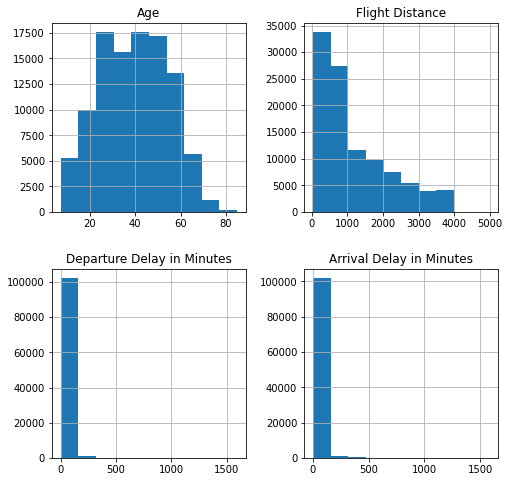

In [20]:
train[num_cols].hist(figsize=(8,8))
plt.show()

## 4. Correlation

### 4.1. Categorical Variables Correlation

The Chi-square test of independence determines whether there is a statistically significant relationship between categorical variables.
 If the p-value of Chi-Square Test is less than the significance value (0.05), it can reject the null hypothesis.



Null hypothesis: There are no relationships between the categorical variables. If you know the value of one variable, it does not help you predict the value of another variable.

Alternative hypothesis: There are relationships between the categorical variables. Knowing the value of one variable does help you predict the value of another variable.

After checking there is any correlation between the variables, the Cramer's V Coefficient is applied. It is interpreted as a measure of the relative (strength) of an association between two variables. The coefficient ranges from 0 to 1 (perfect association). In practice, you may find that a Cramer's V of .10 provides a good minimum threshold for suggesting there is a substantive relationship between two variables.

Describing Strength of Association 

' >.5                   high association

.3 to .5             moderate association

.1 to .3             low association

0 to .1              little if any association

#### Gender


In [21]:
cr1 = pd.crosstab(train['satisfaction'], train['Gender']) # create a contingecy table
cr1

Gender,Female,Male
satisfaction,,
neutral or dissatisfied,30193,28686
satisfied,22534,22491


In [22]:
chi_square_stat, p_value, _, _ = chi2_contingency(cr1) # chi-square test
print(f'p value of chi-square test:{p_value:.3f}')

p value of chi-square test:0.000


Since the p-value of chi-square test is equal to 0.012, we can reject the null hypothesis and conclude there is a relationship between gender and satisfaction.

Let's check how strong that relationship is using Cramer's V association. There is little if any association

In [23]:
correlation_matrix = associations(train, compute_only=True)["corr"] # gives correlation between all variables in the dataset
correlation = correlation_matrix.loc[['Gender']].drop('Gender', axis=1)['satisfaction'].values.item() # We extracted correlation between gender and satisfaction
print(f'Assosiation between Satisfaction and Gender is {correlation:.3f}')

Assosiation between Satisfaction and Gender is 0.012


<Axes: xlabel='Gender', ylabel='count'>

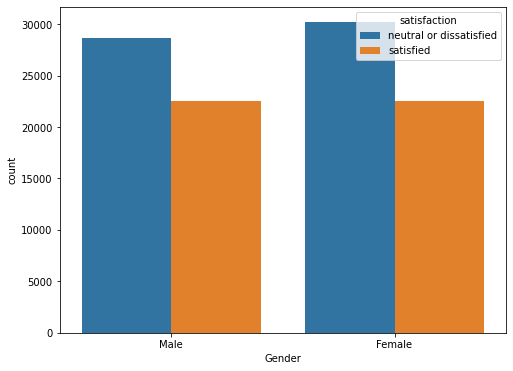

In [24]:
plt.figure(figsize=(8,6))
sns.countplot(x='Gender', hue='satisfaction', data=train)

#### Customer Type

In [25]:
cr2 = pd.crosstab(train['satisfaction'], train['Customer Type']) # create a contingecy table
cr2

Customer Type,Loyal Customer,disloyal Customer
satisfaction,,
neutral or dissatisfied,44390,14489
satisfied,40533,4492


In [26]:
chi_square_stat, p_value, _, _ = chi2_contingency(cr2) # chi-square test
print(f'p value of chi-square test:{p_value:.3f}')

p value of chi-square test:0.000


Since the p-value of chi-square test is equal to 0, we can reject the null hypothesis and conclude there is a relationship between customer type and satisfaction.Let's check how strong that relationship is using Cramer's V association. There is low association

In [27]:
correlation_matrix = associations(train, compute_only=True)["corr"] # gives correlation between all variables in the dataset
correlation = correlation_matrix.loc[['Customer Type']].drop('Customer Type', axis=1)['satisfaction'].values.item() # We extracted correlation between Customer Type and satisfaction
print(f'Assosiation between Satisfaction and Customer Type is {correlation:.3f}')

Assosiation between Satisfaction and Customer Type is 0.188


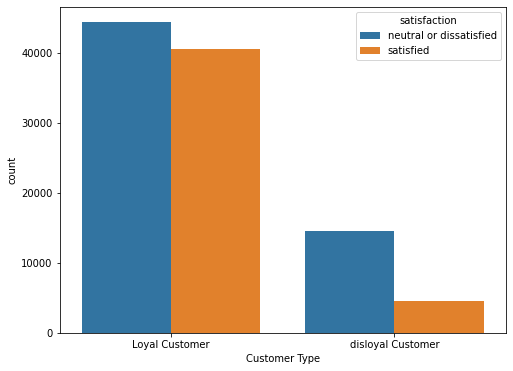

In [28]:
plt.figure(figsize=(8,6))
sns.countplot(x='Customer Type', hue='satisfaction', data=train);

#### Type of Travel

In [29]:
cr3 = pd.crosstab(train['satisfaction'], train['Type of Travel']) # create a contingecy table
cr3

Type of Travel,Business travel,Personal Travel
satisfaction,,
neutral or dissatisfied,29909,28970
satisfied,41746,3279


In [30]:
chi_square_stat, p_value, _, _ = chi2_contingency(cr3) # chi-square test
print(f'p value of chi-square test:{p_value:.3f}')

p value of chi-square test:0.000


Since the p-value of chi-square test is equal to 0, we can reject the null hypothesis and conclude there is a relationship between type of travel and satisfaction. Ther is  moderate association between satisfaction and type of travel.

In [31]:
correlation_matrix = associations(train, compute_only=True)["corr"] # gives correlation between all variables in the dataset
correlation = correlation_matrix.loc[['Type of Travel']].drop('Type of Travel', axis=1)['satisfaction'].values.item() # We extracted correlation between Type of Travel and satisfaction
print(f'Assosiation between Satisfaction and Type of Travel is {correlation:.3f}')

Assosiation between Satisfaction and Type of Travel is 0.449


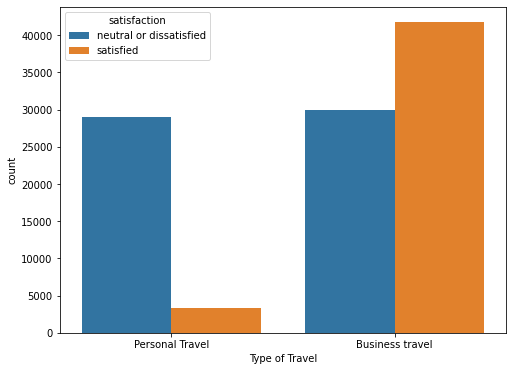

In [32]:
plt.figure(figsize=(8,6))
sns.countplot(x='Type of Travel', hue='satisfaction', data=train);

#### Class

In [33]:
cr4 = pd.crosstab(train['satisfaction'], train['Class']) # create a contingecy table
cr4

Class,Business,Eco,Eco Plus
satisfaction,,,
neutral or dissatisfied,15185,38044,5650
satisfied,34480,8701,1844


In [34]:
chi_square_stat, p_value, _, _ = chi2_contingency(cr4) # chi-square test
print(f'p value of chi-square test:{p_value:.3f}')

p value of chi-square test:0.000


Since the p-value of chi-square test is equal to 0, we can reject the null hypothesis and conclude there is a relationship between Class and satisfaction. There is high association between satisfaction and type of class.

In [35]:
correlation_matrix = associations(train, compute_only=True)["corr"] # gives correlation between all variables in the dataset
correlation = correlation_matrix.loc[['Class']].drop('Class', axis=1)['satisfaction'].values.item() # We extracted correlation between Class and satisfaction
print(f'Assosiation between Satisfaction and Class is {correlation:.3f}')

Assosiation between Satisfaction and Class is 0.505


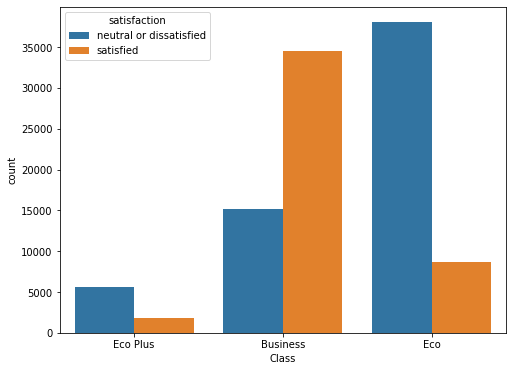

In [36]:
plt.figure(figsize=(8,6))
sns.countplot(x='Class', hue='satisfaction', data=train);

In [37]:
ncols = 2
nrows = np.ceil(len(train.columns)/ncols).astype(int)

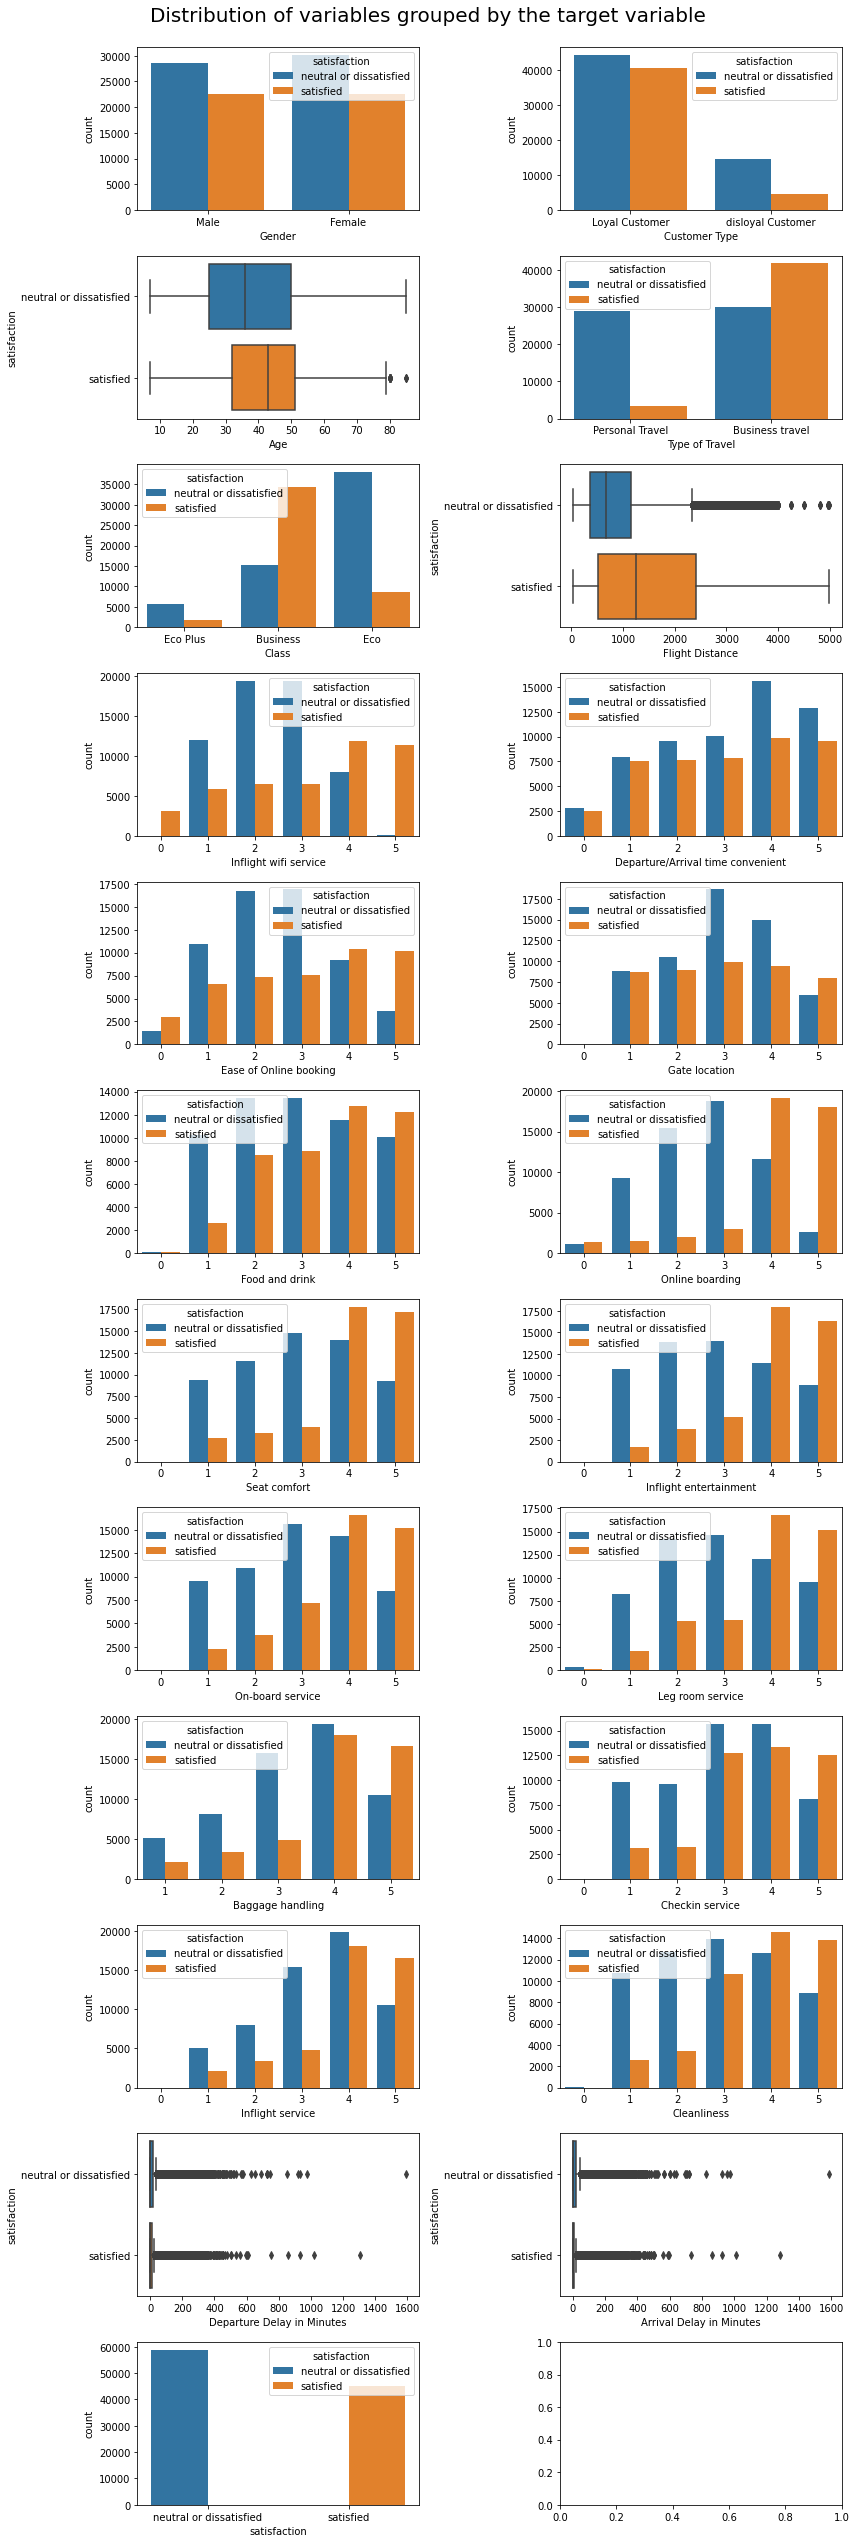

In [38]:
fig, axs = plt.subplots(ncols=ncols, nrows=nrows, figsize=(12,nrows*3))
for c, ax in zip(train.columns, axs.flatten()):
    if c in num_cols:
        sns.boxplot(data=train, x=c, y=train['satisfaction'], ax=ax)
    else:
        sns.countplot(data=train, x=c, hue=train['satisfaction'], ax=ax)
fig.suptitle('Distribution of variables grouped by the target variable', fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.98])

### 5.1. Numerical Variables Correlation

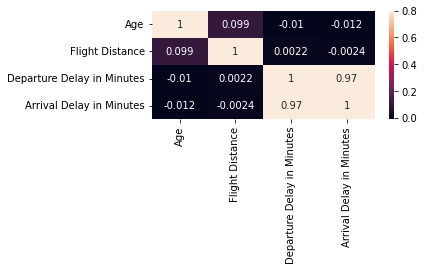

In [39]:
#correlation matrix
corrmat = train.corr()
f, ax = plt.subplots(figsize=(5, 2))
sns.heatmap(corrmat, vmax=.8, annot=True);

## 5.Data Preparation

### 5.1. Missing Values

The following columns are "no use" variables; they did not add values to the predictive model that I am going to build:
Unnamed: 0, id are dropped. 

In the second part, we identified the missing values, the number of na values are 310 and 83 respectively for the 'Arrival Delay in Minutes' train and test datasets.To fill the NA values, 

<Axes: xlabel='Arrival Delay in Minutes', ylabel='Density'>

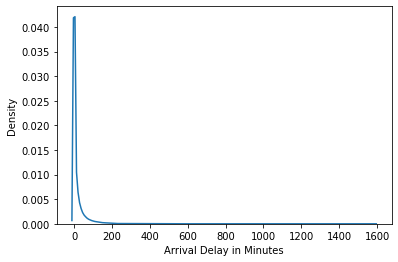

In [40]:
sns.kdeplot(train["Arrival Delay in Minutes"])

Since the Arrival Delay in Minute is highly skewed, the missing values are filled by using median.

In [41]:
arrival_median = train['Arrival Delay in Minutes'].median()
train['Arrival Delay in Minutes'] = train['Arrival Delay in Minutes'].fillna(arrival_median)
test['Arrival Delay in Minutes'] = test['Arrival Delay in Minutes'].fillna(arrival_median)

### 5.2. Label Encoding 

In [42]:
train[categorical_cols].head(3)

,Gender,Customer Type,Type of Travel,Class,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,satisfaction
0,Male,Loyal Customer,Personal Travel,Eco Plus,3,4,3,1,5,3,5,5,4,3,4,4,5,5,neutral or dissatisfied
1,Male,disloyal Customer,Business travel,Business,3,2,3,3,1,3,1,1,1,5,3,1,4,1,neutral or dissatisfied
2,Female,Loyal Customer,Business travel,Business,2,2,2,2,5,5,5,5,4,3,4,4,4,5,satisfied


In [43]:
train['Gender'] = preprocessing.LabelEncoder().fit_transform(train['Gender'])#1-Male
train['Customer Type'] = preprocessing.LabelEncoder().fit_transform(train['Customer Type'])#1-diloyal customer
train['Type of Travel'] = preprocessing.LabelEncoder().fit_transform(train['Type of Travel'])#1-Personal Travel
train['Class'] = preprocessing.LabelEncoder().fit_transform(train['Class'])#2-Eco Plus	,0-Business
train['satisfaction'] = preprocessing.LabelEncoder().fit_transform(train['satisfaction'])#1 satisfied


In [44]:
train[categorical_cols].head(5)

,Gender,Customer Type,Type of Travel,Class,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,satisfaction
0,1,0,1,2,3,4,3,1,5,3,5,5,4,3,4,4,5,5,0
1,1,1,0,0,3,2,3,3,1,3,1,1,1,5,3,1,4,1,0
2,0,0,0,0,2,2,2,2,5,5,5,5,4,3,4,4,4,5,1
3,0,0,0,0,2,5,5,5,2,2,2,2,2,5,3,1,4,2,0
4,1,0,0,0,3,3,3,3,4,5,5,3,3,4,4,3,3,3,1


In [45]:
test[categorical_cols].head(3)

,Gender,Customer Type,Type of Travel,Class,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,satisfaction
0,Female,Loyal Customer,Business travel,Eco,5,4,3,4,3,4,3,5,5,5,5,2,5,5,satisfied
1,Female,Loyal Customer,Business travel,Business,1,1,3,1,5,4,5,4,4,4,4,3,4,5,satisfied
2,Male,disloyal Customer,Business travel,Eco,2,0,2,4,2,2,2,2,4,1,3,2,2,2,neutral or dissatisfied


In [46]:
test['Gender'] = preprocessing.LabelEncoder().fit_transform(test['Gender'])#1-Male
test['Customer Type'] = preprocessing.LabelEncoder().fit_transform(test['Customer Type'])#1-diloyal customer
test['Type of Travel'] = preprocessing.LabelEncoder().fit_transform(test['Type of Travel'])#1-Personal Travel
test['Class'] = preprocessing.LabelEncoder().fit_transform(test['Class'])#2-Eco Plus	,0-Business
test['satisfaction'] = preprocessing.LabelEncoder().fit_transform(test['satisfaction'])#1 satisfied

In [47]:
test[categorical_cols].head(3)

,Gender,Customer Type,Type of Travel,Class,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,satisfaction
0,0,0,0,1,5,4,3,4,3,4,3,5,5,5,5,2,5,5,1
1,0,0,0,0,1,1,3,1,5,4,5,4,4,4,4,3,4,5,1
2,1,1,0,1,2,0,2,4,2,2,2,2,4,1,3,2,2,2,0


### 6. Feature Selection

### 7. Data Standardization

In [48]:
X_train = train.drop('satisfaction', axis = 1)
y_train = train.satisfaction

X_test = test.drop('satisfaction', axis=1)
y_test = test.satisfaction

In [49]:
# Creating Random Forest (rf) model with default values
rf = RandomForestClassifier()

# Fitting model to train data
rf.fit(X_train, y_train)

# Obtaining feature importances
rf.feature_importances_

array([0.00485137, 0.03514485, 0.03376439, 0.09711851, 0.09676658,
       0.0362686 , 0.14324642, 0.0171362 , 0.0340293 , 0.0170427 ,
       0.01182493, 0.18655339, 0.03925663, 0.0514634 , 0.0336198 ,
       0.0386931 , 0.02676956, 0.02375652, 0.02375155, 0.0252977 ,
       0.01118895, 0.01245554])

In [50]:
# Obtaining feature names
rf.feature_names_in_

array(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding',
       'Seat comfort', 'Inflight entertainment', 'On-board service',
       'Leg room service', 'Baggage handling', 'Checkin service',
       'Inflight service', 'Cleanliness', 'Departure Delay in Minutes',
       'Arrival Delay in Minutes'], dtype=object)

In [51]:
# Creating importances_df dataframe
importances_df = pd.DataFrame({"feature_names" : rf.feature_names_in_, 
                               "importances" : rf.feature_importances_})
                             
importances_df.sort_values(by="importances", ascending=False)

,feature_names,importances
11,Online boarding,0.186553
6,Inflight wifi service,0.143246
3,Type of Travel,0.097119
4,Class,0.096767
13,Inflight entertainment,0.051463
12,Seat comfort,0.039257
15,Leg room service,0.038693
5,Flight Distance,0.036269
1,Customer Type,0.035145
8,Ease of Online booking,0.034029


In [52]:
importances_df.sort_values(by="importances", ascending=False)

,feature_names,importances
11,Online boarding,0.186553
6,Inflight wifi service,0.143246
3,Type of Travel,0.097119
4,Class,0.096767
13,Inflight entertainment,0.051463
12,Seat comfort,0.039257
15,Leg room service,0.038693
5,Flight Distance,0.036269
1,Customer Type,0.035145
8,Ease of Online booking,0.034029


When the feature importance is lower than 0.020, they are dropped.

In [53]:
new_features=['Customer Type','Age','Type of Travel','Class','Flight Distance','Inflight wifi service','Ease of Online booking','Online boarding','Seat comfort','Inflight entertainment','On-board service','Leg room service','Baggage handling','Checkin service','Inflight service','Cleanliness']

X_trainnew=X_train[new_features]
X_testnew=X_test[new_features]

In [54]:
X_trainnew.head(3)

,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Ease of Online booking,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness
0,0,13,1,2,460,3,3,3,5,5,4,3,4,4,5,5
1,1,25,0,0,235,3,3,3,1,1,1,5,3,1,4,1
2,0,26,0,0,1142,2,2,5,5,5,4,3,4,4,4,5


In [55]:
# Data Standardization
Scaler = StandardScaler()
X_trainnew = Scaler.fit_transform(X_trainnew)
X_testnew = Scaler.fit_transform(X_testnew)

In [56]:
print(X_trainnew.shape)
print(X_testnew.shape)

(103904, 16)
(25976, 16)


## MODEL BUILDING

In [ ]:
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing

I will build three different models - Random Forest, Logistic Regression and SVM for this classification problem.

In [62]:
models = [] # ML Models
models.append(("Random Forest", RandomForestClassifier()))
models.append(("Logistic Regression", LogisticRegression(solver='liblinear')))
models.append(("SVM", svm.SVC(kernel='linear')))

n_folds = 5
results = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=n_folds)
    print("Testing model:", name)
    
    # Cross Validation Score
    cv_results = model_selection.cross_val_score(model, X_trainnew, y_train, cv=kfold, scoring="f1_weighted", verbose=0, n_jobs=-1)
    
    # Fitting the Model
    model.fit(X_trainnew,y_train)
    
    # Model Predictions and Finding Accuracy
    train_pred = model.predict(X_trainnew)
    Training_score = accuracy_score(train_pred,y_train)
    test_pred = model.predict(X_testnew)
    Test_score = accuracy_score(test_pred,y_test)
    auc = roc_auc_score(y_test, test_pred)
    f1 = f1_score(y_test, test_pred)
    
    results.append(cv_results)
    
    msg = f"Cross_Val Mean: {cv_results.mean()}, Training Accuracy: {Training_score}, Testing Accuracy: {Test_score}, AUC : {auc}, F1 : {f1} "
    print(msg + "\n")

Testing model: Random Forest
Cross_Val Mean: 0.9624045764516136, Training Accuracy: 1.0, Testing Accuracy: 0.9623883584847551, AUC : 0.960079050322568, F1 : 0.9564636157034 

Testing model: Logistic Regression
Cross_Val Mean: 0.8733390686734642, Training Accuracy: 0.8739317061903296, Testing Accuracy: 0.8698028949799815, AUC : 0.8656122190604525, F1 : 0.8486123545210386 

Testing model: SVM
Cross_Val Mean: 0.8748245382956442, Training Accuracy: 0.8753657222051124, Testing Accuracy: 0.870611333538651, AUC : 0.8652930783551135, F1 : 0.847925433238315 



In [63]:
# Data Standardization
Scaler = StandardScaler()
X_trains = Scaler.fit_transform(X_train)
X_tests = Scaler.fit_transform(X_test)

In [64]:
from sklearn.decomposition import PCA

In [65]:
pca = PCA()
df_pca = pd.DataFrame(pca.fit_transform(X_trains))
df_pca

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,-1.286449,0.804481,0.384984,-0.345823,3.712751,0.697121,0.403432,-0.942480,-0.615804,1.780729,...,0.349104,-0.331070,0.248910,0.644029,0.665912,0.147831,-0.489414,-0.597100,-0.138472,0.136580
1,3.083860,-0.785387,-1.683965,-0.098475,-2.261925,1.980150,0.972699,-0.994691,0.848401,0.417893,...,-0.982193,-0.745572,0.379323,0.776190,-0.946027,-0.239434,0.292780,0.414952,0.041965,-0.089794
2,-2.377369,1.877609,1.051205,-0.422384,-0.162350,0.478291,-1.014037,0.409373,-0.476621,0.699533,...,-0.026815,0.231260,-0.185226,-0.004461,0.333637,-0.446606,0.189542,-0.108885,0.079079,0.004074
3,1.531760,-2.305845,-0.958702,-0.046854,-0.994341,0.510036,0.450137,2.009534,1.084452,0.128943,...,-0.446895,-0.447002,-0.188391,0.749671,0.275779,-0.216380,0.141957,-0.963822,-0.169593,0.047466
4,-1.107126,-0.235398,0.903403,-0.396977,-0.883813,-0.598220,0.428831,-1.505462,0.540579,-0.963693,...,-0.515107,-0.232288,0.177732,-0.555849,-0.063541,-0.667534,-0.695802,0.125560,-0.230783,0.001776
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,3.102249,0.693425,-0.609943,-0.525114,-0.675849,2.448708,-0.858485,0.358060,0.253047,-0.368391,...,-0.235631,0.402426,0.176664,-0.635910,0.009891,0.017892,0.002431,-0.058502,-0.064154,0.069139
103900,-3.425558,-0.794561,-1.555232,-0.199604,-0.707560,-0.865605,0.791090,-0.241464,-0.559943,-0.453853,...,-0.080741,0.514276,0.725429,0.043961,0.281445,0.938605,-0.182375,-0.035229,0.306888,-0.003404
103901,-0.363269,2.886363,-0.254131,-0.001808,-0.470731,1.679120,1.260634,0.630149,-2.099395,-1.179765,...,-0.567076,0.071382,0.040576,0.620637,-0.651490,0.657465,-0.777161,-0.074007,-0.026514,-0.130430
103902,3.516914,0.632844,-2.280746,-0.374499,-1.303677,1.441407,-0.797207,0.956015,-1.192297,-1.130947,...,1.275297,1.931303,0.012206,1.424639,-0.406046,-0.579683,0.235889,0.369533,-0.056799,0.010027


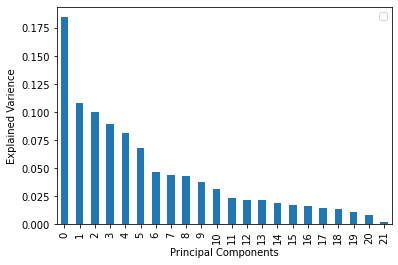

In [66]:
import matplotlib.pyplot as plt
pd.DataFrame(pca.explained_variance_ratio_).plot.bar()
plt.legend('')
plt.xlabel('Principal Components')
plt.ylabel('Explained Varience');

In [67]:
pca.explained_variance_ratio_

array([0.18476449, 0.10792789, 0.10017448, 0.08924708, 0.08144167,
       0.06774459, 0.04633418, 0.04377913, 0.04282313, 0.03732121,
       0.03148747, 0.02341693, 0.02189887, 0.02109171, 0.01915573,
       0.01669128, 0.01604051, 0.01425113, 0.0133737 , 0.01115872,
       0.00807087, 0.00180523])

In [68]:

0.18476449+ 0.10792789+0.10017448+ 0.08924708+0.08144167+ 0.06774459+ 0.04633418+0.04377913+ 0.04282313+ 0.03732121

0.80155785

In [69]:
loading_scores = pd.Series(pca.components_[0], index=X_train.columns)

In [70]:
loading_scores = pd.Series(pca.components_[0], index=X_train.columns)
sorted_loading_scores = loading_scores.abs().sort_values(ascending=False)
top_10_features = sorted_loading_scores[0:10].index.values
top_features = pd.DataFrame(loading_scores[top_10_features], columns=['Score'])
top_features.style.set_properties(**{'text-align': 'center'}).set_table_styles([dict(selector='th', props=[('text-align', 'left')])])

,Score
Inflight entertainment,-0.401114
Seat comfort,-0.335774
Cleanliness,-0.331070
Online boarding,-0.294521
Food and drink,-0.281105
On-board service,-0.265157
Inflight service,-0.243104
Baggage handling,-0.240319
Leg room service,-0.219738
Class,0.214745


### Best Parameter Tuning

In [71]:
clf=RandomForestClassifier(random_state=0)
# number of trees in random forest
n_estimators = [100,200,300,400,500,600]
# number of features at every split
max_features = [1,2,3,4,5,6,7,8]
# create grid
params = {
 'n_estimators': n_estimators,
 'max_features': max_features,
 }
params

{'n_estimators': [100, 200, 300, 400, 500, 600],
 'max_features': [1, 2, 3, 4, 5, 6, 7, 8]}

Since we decided that by looking the AUC and F1 score the Random Forest is the best model to making prediction with this data set, we try to find best parameters of the model with the help of grid search approach.

In [72]:
# Grid search of parameters
clf_grid = GridSearchCV(estimator = clf, param_grid = params, 
                                cv = 5, verbose=2, scoring='accuracy',n_jobs = -1)
# Fit the model
clf_grid.fit(X_train, y_train)
# print results
print(clf_grid.best_params_)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
{'max_features': 8, 'n_estimators': 300}


It is determined that model with 300 estimator and 8 features gives the best solution. So we are seting up the model with these parameters again and trying to obtain best performance metrics.

In [76]:
clf=RandomForestClassifier(random_state=0,n_estimators=300,max_features=8,oob_score=True)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print('Test Accuracy:', accuracy_score(y_test, y_pred))
print('AUC:', roc_auc_score(y_test, y_pred))
print('F1:', f1_score(y_test, y_pred))

Test Accuracy: 0.9643517092700955
AUC: 0.9621626945839247
F1: 0.9587711487088156


As it seen that our selected best algorithm (Random Forest) gives the better performance with estimated best parameters.